### **Listing 3.1 Loading the IMDB dataset**

In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
a = word_index["stands"]
print(a)

def text_to_vector(txt):
  txtlist = txt.split()
  textVector =list()
  for word in txtlist:
    number = word_index.get(word)
    textVector.append(number)
  return textVector

text = 'This movie is too good everyone should watch this'
vector = text_to_vector(text)
print(vector)

1404
[None, 17, 6, 96, 49, 313, 141, 103, 11]


In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### **Listing 3.2 Encoding the integer sequences into a binary matrix**

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### **Listing 3.3 The model definition**

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### **Listing 3.7 Setting aside a validation set**

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### **Listing 3.8 Training your model**

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [16]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5966 - acc: 0.6970 - val_loss: 0.4050 - val_acc: 0.8465
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3194 - acc: 0.9008 - val_loss: 0.3026 - val_acc: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2311 - acc: 0.9280 - val_loss: 0.2957 - val_acc: 0.8793
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1745 - acc: 0.9448 - val_loss: 0.2939 - val_acc: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1386 - acc: 0.9585 - val_loss: 0.2933 - val_acc: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1114 - acc: 0.9665 - val_loss: 0.3263 - val_acc: 0.8783
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0936 - acc: 0.9744 - val_loss: 0.3106 - val_acc: 0.8834
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0760 - a

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### **Listing 3.9 Plotting the training and validation loss**

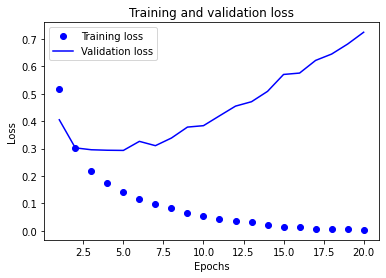

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Listing 3.10 Plotting the training and validation accuracy**

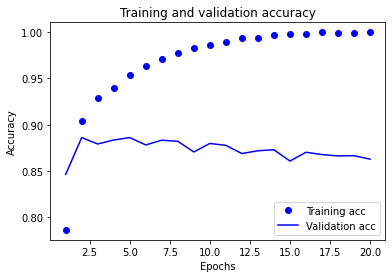

In [19]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.5321 - accuracy: 0.7568
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2621 - accuracy: 0.9117
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1967 - accuracy: 0.9306
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3004 - accuracy: 0.8816


In [21]:
results

[0.30035561323165894, 0.8816400170326233]

In [22]:
model.predict(x_test)

array([[0.18207565],
       [0.99992484],
       [0.82538474],
       ...,
       [0.11042032],
       [0.07911617],
       [0.61964864]], dtype=float32)

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.5341 - accuracy: 0.7424
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2427 - accuracy: 0.9162
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1868 - accuracy: 0.9344
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3152 - accuracy: 0.8796
[0.3152320981025696, 0.8796399831771851]


In [24]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 35ms/step - loss: 0.5346 - accuracy: 0.7372
Epoch 2/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2505 - accuracy: 0.9106
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.1820 - accuracy: 0.9348
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3818 - accuracy: 0.8615
[0.38181108236312866, 0.861519992351532]


In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.1912 - accuracy: 0.7284
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0793 - accuracy: 0.9063
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0564 - accuracy: 0.9343
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.8692
[0.0971919596195221, 0.8692399859428406]


In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.1733 - accuracy: 0.7418
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0664 - accuracy: 0.9156
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0487 - accuracy: 0.9395
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0977 - accuracy: 0.8744
[0.09771499037742615, 0.8743600249290466]


In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)


Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.5350 - accuracy: 0.7642
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2933 - accuracy: 0.9053
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2238 - accuracy: 0.9229
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2832 - accuracy: 0.8862
[0.28323954343795776, 0.8862400054931641]


In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.1866 - accuracy: 0.7390
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0867 - accuracy: 0.9099
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0635 - accuracy: 0.9326
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0873 - accuracy: 0.8827
[0.08725547790527344, 0.8827199935913086]


In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.1765 - accuracy: 0.7572
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0829 - accuracy: 0.9128
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0607 - accuracy: 0.9341
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0847 - accuracy: 0.8863
[0.08471604436635971, 0.8863199949264526]


In [13]:
model.predict(x_test)

array([[0.18954402],
       [0.9974536 ],
       [0.7539308 ],
       ...,
       [0.21596771],
       [0.1210562 ],
       [0.48489586]], dtype=float32)